In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install mtcnn


     |████████████████████████████████| 2.3MB 9.7MB/s 
  Created wheel for mtcnn: filename=mtcnn-0.0.9-cp36-none-any.whl size=2257690 sha256=8af900cdb37937d8ded37fc7e764e13ae45c9389eddc0beafb79f97ac93755dd
  Stored in directory: /root/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn


In [3]:
!pip install pillow


In [4]:
from PIL import Image
import numpy as np
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from numpy import expand_dims
from scipy.spatial.distance import cosine

In [0]:
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array







Instructions for updating:
Deprecated in favor of operator or tf.math.divide.



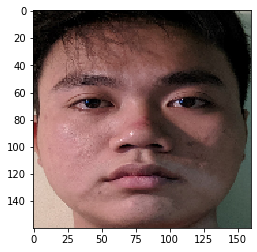

In [6]:
pixel1 = extract_face('/content/drive/My Drive/COLAB/image/4.jpg')
pixel2 = extract_face('/content/drive/My Drive/COLAB/image/111.jpg')
plt.imshow(pixel1)
plt.show()

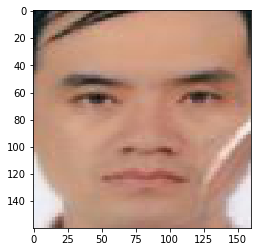

In [7]:
plt.imshow(pixel2)
plt.show()

In [14]:
from keras.models import load_model
# load the model
model = load_model('/content/drive/My Drive/COLAB/model/facenet_keras.h5')
print('Loaded Model')

Loaded Model


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [9]:
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1:0' shape=(?, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Merge:0' shape=(?, 128) dtype=float32>]


In [0]:
def get_embedding(filename):
  face = extract_face(filename)
  face = face.astype('float32')
  samples = expand_dims(face, axis=0)
  yhat = model.predict(samples)
  return yhat[0]

In [0]:

img1 = '/content/drive/My Drive/COLAB/image/01.jpeg'
img2 = '/content/drive/My Drive/COLAB/image/111.jpg'

In [0]:
known_embedding = get_embedding(img1)
candidate_embedding = get_embedding(img2)


In [26]:
thresh = 0.5
score = cosine(known_embedding, candidate_embedding)
if score <= thresh:
  print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
else:
  print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

>face is a Match (0.094 <= 0.500)
